<h1>Эмпирические функции распределения </h1>
    
Необходимо сгенерировать выборки размером 20, 60 и 100 элементов. Построить на них эмпмерические функции распределения и ядерные оценки плотности распределения на отрезке [-4; 4] для непрерывных распределений и на отрезке [4; 16] для распределения Пуассона.

Подключаем все необходиые библиотеки

In [1]:
from scipy.stats import norm, laplace, poisson, cauchy, uniform
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sizes = [20, 60, 100]
koeff = [0.5, 1, 2]
left_boarder, right_boarder = -4, 4
poisson_left_boarder, poisson_right_boarder = 4, 16
number_of_samples = 5
NORMAL, CAUCHY, LAPLACE, POISSON, UNIFORM = "Normal", "Cauchy", "Laplace", "Poisson", "Uniform"
EXPANSION = '.png'
FILEPATH = 'graphs/'
KERNEL = 'K'
EMPIRIC = 'E'

In [3]:
def get_rvs(size):
    rvs_list = [norm.rvs(size=size), cauchy.rvs(size=size), laplace.rvs(size=size, scale=1 / m.sqrt(2), loc=0), 
                poisson.rvs(10, size=size), uniform.rvs(size=size, loc=-m.sqrt(3), scale=2 * m.sqrt(3))]
    return rvs_list

In [4]:
def get_pdf(x):
    pdf_list = [norm.pdf(x), cauchy.pdf(x), laplace.pdf(x, loc=0, scale=1 / m.sqrt(2)), poisson(10).pmf(x), 
                uniform.pdf(x, loc=-m.sqrt(3), scale=2 * m.sqrt(3))]
    return pdf_list

In [5]:
def get_name():
    return [NORMAL, CAUCHY, LAPLACE, POISSON, UNIFORM]

In [6]:
def get_cdf(x):
    cdf_list = [norm.cdf(x), cauchy.cdf(x), laplace.cdf(x, loc=0, scale=1 / m.sqrt(2)), poisson.cdf(x, mu=10),
                uniform.cdf(x, loc=-m.sqrt(3), scale=2 * m.sqrt(3))]
    return cdf_list

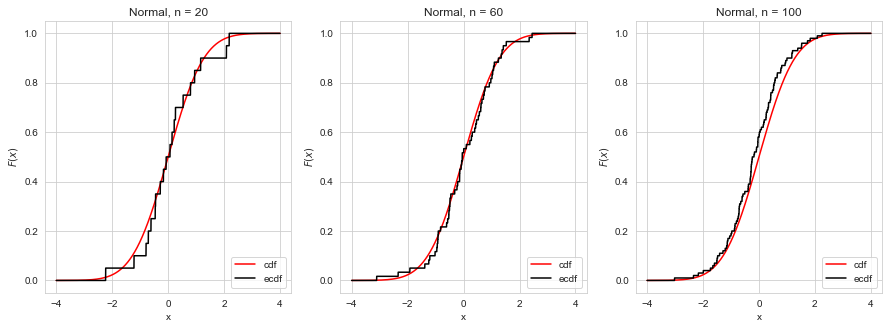

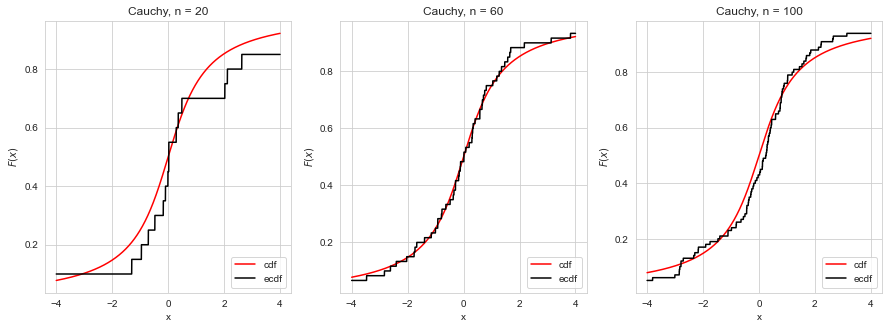

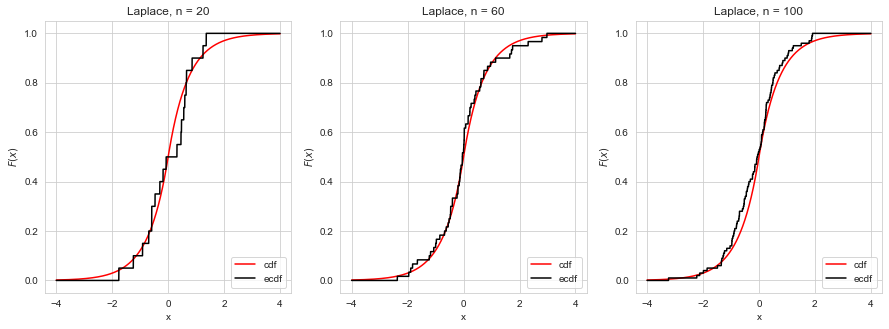

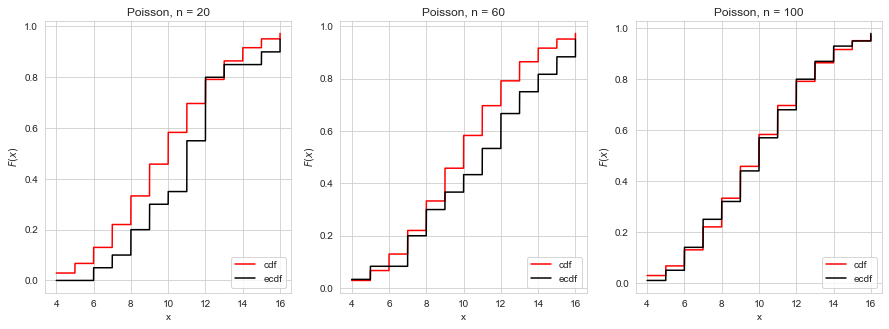

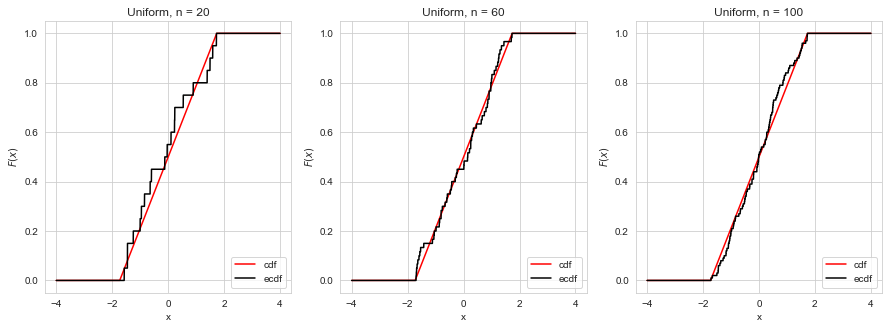

In [9]:
def DrawGraphs():
    sns.set_style('whitegrid')
    for num in range(number_of_samples):
        figures, axs = plt.subplots(ncols = 3, figsize = (15,5))
        for size in range(len(sizes)):
            rvs_list = get_rvs(sizes[size])
            name_list = get_name()
            if num != 3:
                x = np.linspace(left_boarder, right_boarder, 10000)
            else:
                x = np.linspace(poisson_left_boarder, poisson_right_boarder, 10000)
            y = get_cdf(x)
            sample = rvs_list[num]
            sample.sort()
            ecdf = ECDF(sample)
            axs[size].plot(x, y[num], color = 'red', label = 'cdf')
            axs[size].plot(x, ecdf(x), color = 'black', label = 'ecdf')
            axs[size].legend(loc = 'lower right')
            axs[size].set(xlabel = 'x', ylabel = '$F(x)$')
            axs[size].set_title(name_list[num] + ', n = ' + str(sizes[size]))
        figures.savefig(str(FILEPATH) + name_list[num] + EMPIRIC + EXPANSION)
    return

DrawGraphs()

<h1>Построение ядерных оценок плотности распределения</h1>

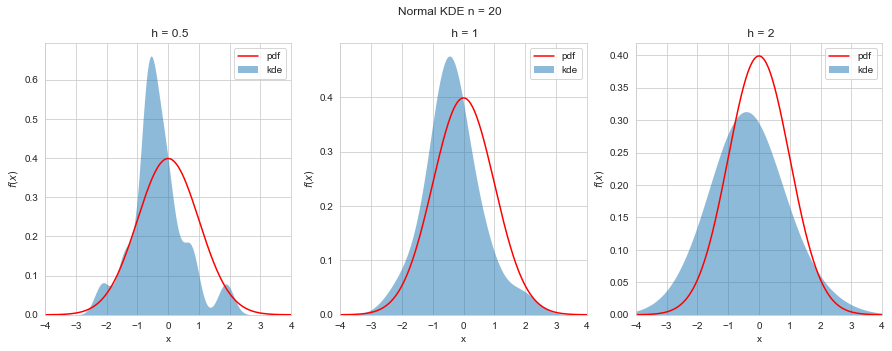

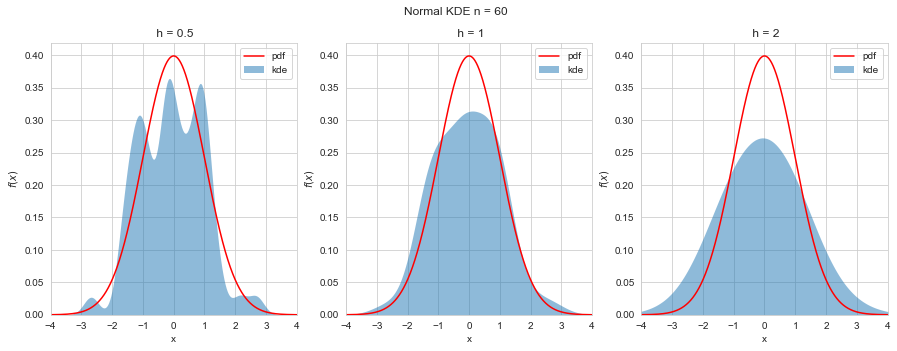

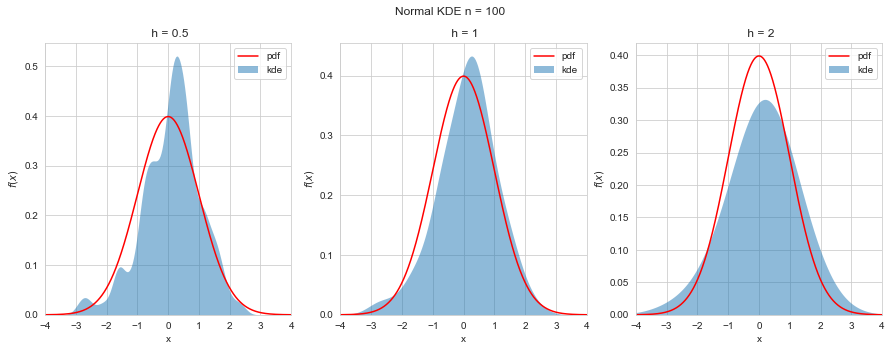

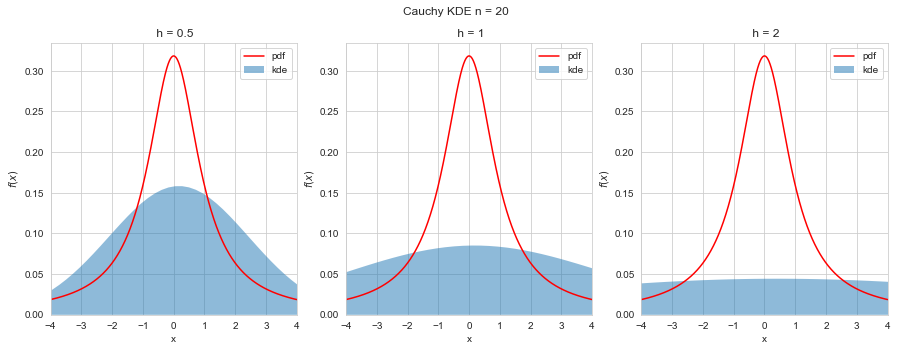

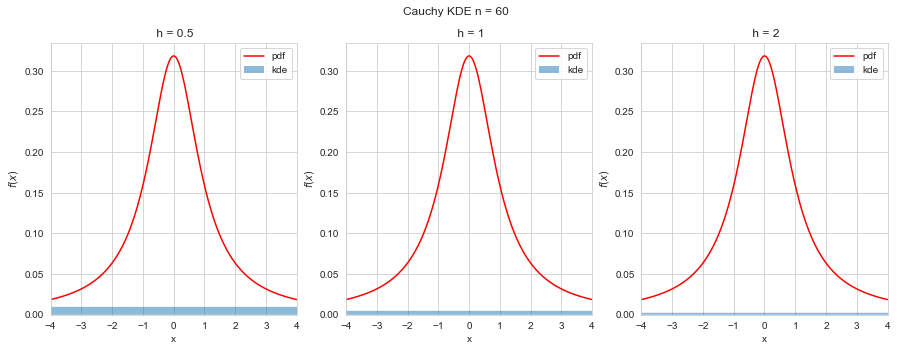

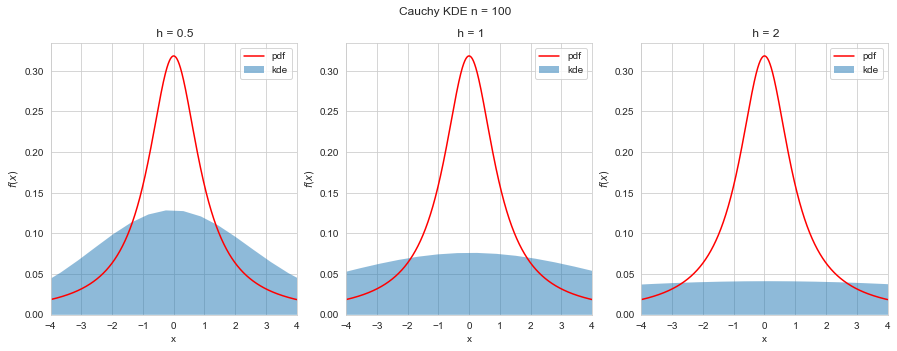

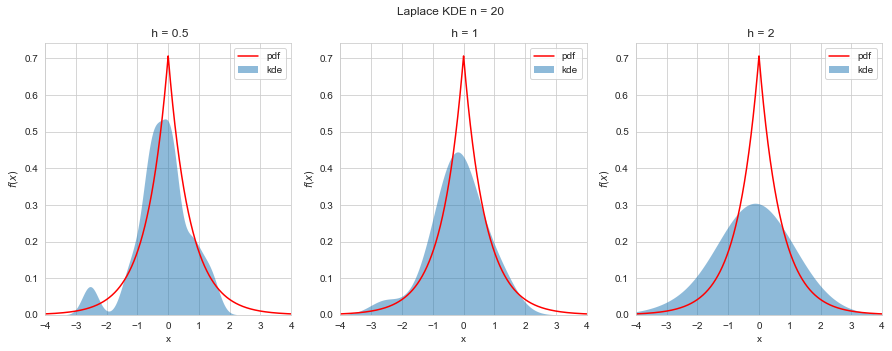

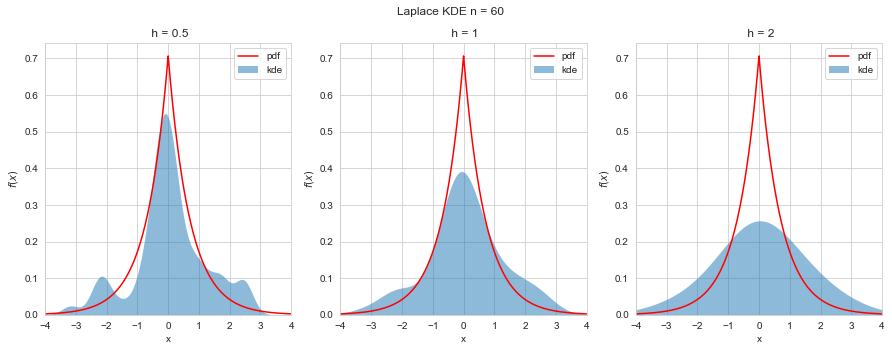

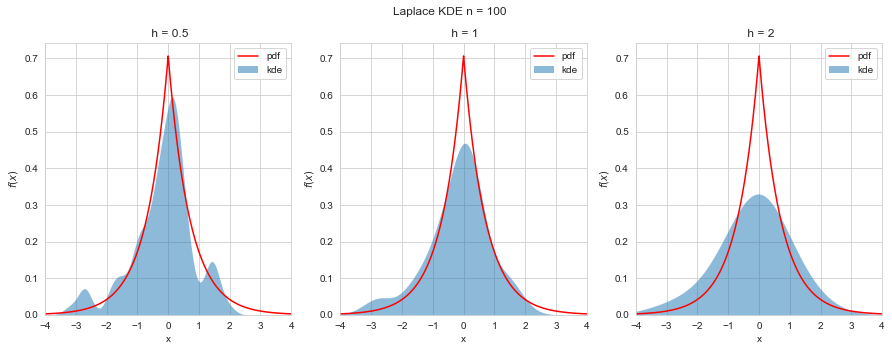

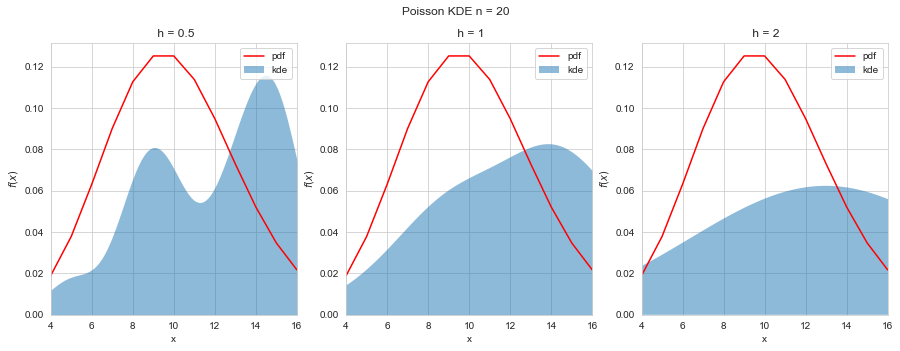

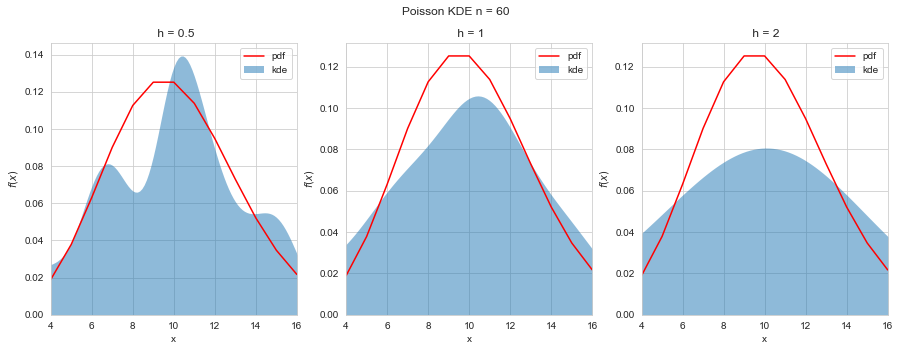

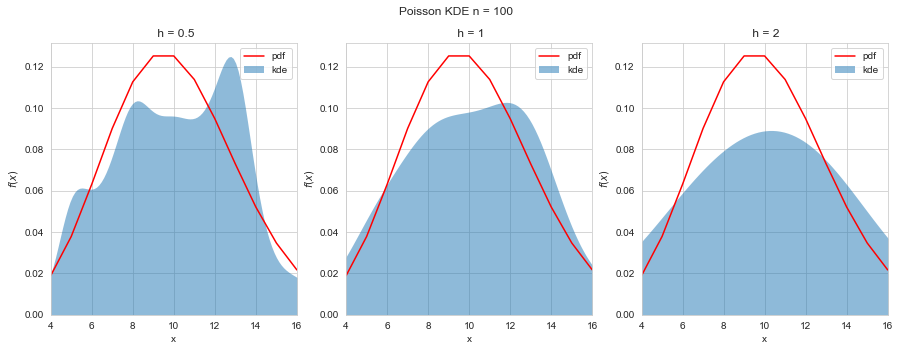

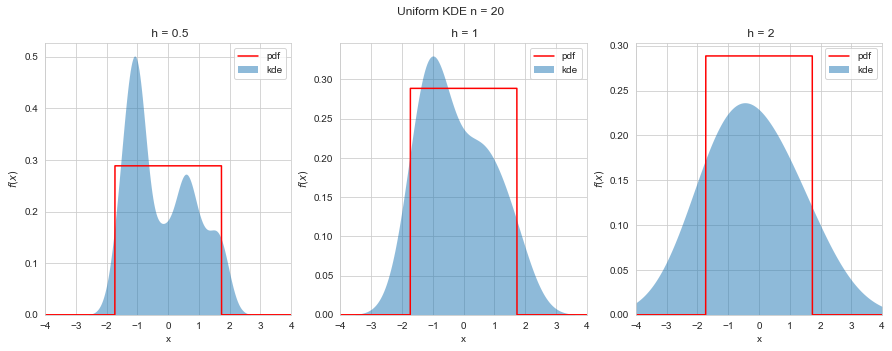

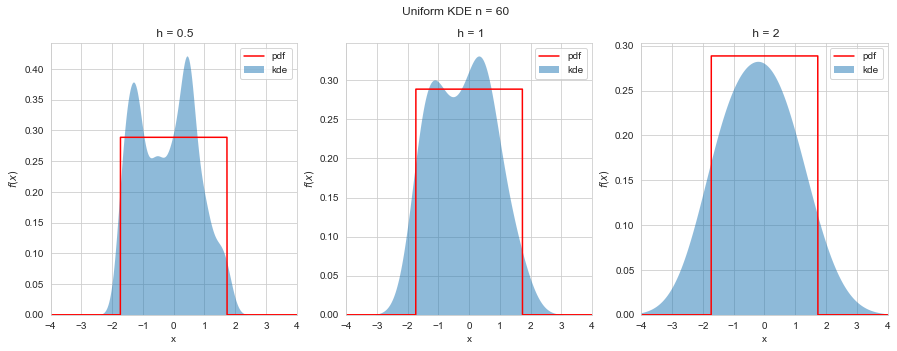

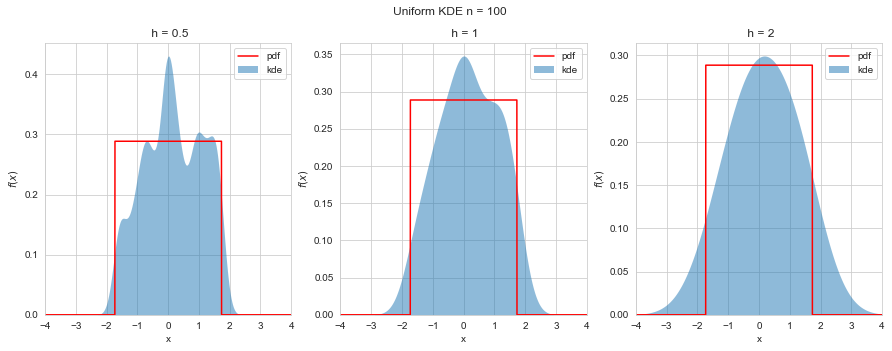

In [10]:
def DrawKDE():
    sns.set_style('whitegrid')
    for num in range(number_of_samples):
        for size in range(len(sizes)):
            figures, axs = plt.subplots(ncols=3, figsize=(15,5))
            rvs_list = get_rvs(sizes[size])
            name_list = get_name()
            if num != 3:
                x = np.linspace(left_boarder, right_boarder, 10000)
                start, stop = left_boarder, right_boarder
            else:
                x = np.linspace(poisson_left_boarder, poisson_right_boarder, -poisson_left_boarder + poisson_right_boarder + 1)   
                start, stop =poisson_left_boarder, poisson_right_boarder
            for kf in range(len(koeff)):
                y = get_pdf(x)    
                sample = rvs_list[num]
                axs[kf].plot(x, y[num], color='red', label='pdf')
                sns.kdeplot(data=sample, bw_method='silverman', bw_adjust = koeff[kf], ax=axs[kf], 
                            fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0, label='kde')
                axs[kf].legend(loc='upper right')
                axs[kf].set(xlabel='x', ylabel='$f(x)$')
                axs[kf].set_xlim([start, stop])
                axs[kf].set_title(' h = ' + str(koeff[kf]))
            figures.suptitle(name_list[num] + ' KDE n = ' + str(sizes[size]))
            figures.savefig(str(FILEPATH) + name_list[num] + KERNEL + str(sizes[size]) + EXPANSION)
    return

DrawKDE()
